### Prashant Madaan

# Classification With LDA and QDA Approaches

# Data

## Introduction of Data for Classification

The dataset aims to classify the type of forest cover. One of the inspirations for applying machine learning to this dataset was the Natural managers who are responsible for developing ecosystem management strategies and require basic descriptive information to support their decision-making process. However, the managers generally do not have this type of data for inholdings or neighboring lands that are outside their jurisdiction.

The dataset has 581012 rows with 54 columns. There are 12 measures in the data set comprising 10 quantitative variables, 4 binary wilderness areas, and 40 binary soil type variables.

<table style="width:100%">
  <tr>
    <th>Name</th>
    <th>Data Type</th> 
    <th>Measurement</th>
      <th>Description</th>
  </tr>
  <tr>
    <td>Elevation</td>
    <td>quantitative</td> 
    <td>meters</td>
     <td>Elevation in meters</td>
  </tr>
  <tr>
    <td>Aspect</td>
    <td>quantitative</td> 
    <td>azimuth</td>
     <td>Aspect in degrees azimuth</td>
  </tr>
  <tr>
    <td>Slope</td>
    <td>quantitative</td> 
    <td>degrees</td>
     <td> Slope in degrees</td>
  </tr>
  <tr>
    <td>Horizontal_Distance_To_Hydrology</td>
    <td>quantitative</td> 
    <td>meters</td>
     <td>Horz Dist to nearest surface water features</td>
  </tr>
  <tr>
    <td>Vertical_Distance_To_Hydrology</td>
    <td>quantitative</td> 
    <td>meters</td>
     <td>Vert Dist to nearest surface water features</td>
  </tr>
  <tr>
    <td>Horizontal_Distance_To_Roadways</td>
    <td>quantitative</td> 
    <td>meters</td>
     <td>Horz Dist to nearest roadway</td>
  </tr>
  <tr>
    <td>Hillshade_9am</td>
    <td>quantitative</td> 
    <td>0 to 255 index</td>
     <td>Hillshade index at 9am, summer solstice</td>
  </tr>
  <tr>
    <td>Hillshade_Noon</td>
    <td>quantitative</td> 
    <td>0 to 255 index</td>
     <td>Hillshade index at noon, summer soltice</td>
  </tr>
  <tr>
    <td>Hillshade_3pm</td>
    <td>quantitative</td> 
    <td>0 to 255 index</td>
     <td> Hillshade index at 3pm, summer solstice</td>
  </tr>
  <tr>
    <td>Horizontal_Distance_To_Fire_Points</td>
    <td>quantitative</td> 
    <td>meters</td>
     <td> Horz Dist to nearest wildfire ignition</td>
  </tr>
  <tr>
    <td>Wilderness_Area (4 binary columns)</td>
    <td>qualitative</td> 
    <td>0 (absence) or 1 (presence)</td>
     <td>Wilderness area designation</td>
  </tr>
   <tr>
    <td>Soil_Type (40 binary columns)</td>
    <td>qualitative</td> 
    <td>0 (absence) or 1 (presence)</td>
     <td> Soil Type designation</td>
  </tr>
   <tr>
    <td>Cover_Type (7 types)</td>
    <td>integer</td> 
    <td>1 to 7</td>
     <td>Forest Cover Type designation</td>
  </tr>
</table>

There are a total of 7 forest cover types:
                                1. -- Spruce/Fir
                                2. -- Lodgepole Pine
                                3. -- Ponderosa Pine
                                4. -- Cottonwood/Willow
                                5. -- Aspen
                                6. -- Douglas-fir
                                7. -- Krummholz
                                
There are total 4 types of wilderness areas which were examined: 
                        1. -- Rawah Wilderness Area
                        2. -- Neota Wilderness Area
                        3. -- Comanche Peak Wilderness Area
                        4. -- Cache la Poudre Wilderness Area
                        
There are total 40 soil types,1 to 40: based on the USFS Ecological Landtype Units (ELUs).

Since now we have some intuition about our data set, we will move forward and start with reading the data.



### Source Of Data

The data has been picked from a dataset from the UCI machine learning data repository. The original source of data is as below: 

Remote Sensing and GIS Program
        Department of Forest Sciences
        College of Natural Resources
        Colorado State University
        Fort Collins, CO  80523
        (contact Jock A. Blackard, jblackard 'at' fs.fed.us
              or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)
              
UCI Repository Link -->https://archive.ics.uci.edu/ml/datasets/Covertype


In [4]:
import pandas as pd
import numpy as np
import matplotlib as matpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scipyst

###  Reading the Data
Initial Observations after downloading the data: 
1. The data file has .data extension. 
2. The rows in the file have column separated data.
3. There are no headers in the file.

As there are no headers in the file, I created a list of headers called columns and read the data using read_table function in the pandas library

In [6]:
data_columns=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','_Rawah_Wilderness_Area','Neota_Wilderness_Area','Comanche_Peak_Wilderness_Area','Cache_la_Poudre_Wilderness_Area','Cathedral_family','Vanet','Haploborolis','Ratake_family','Vanet_family','Vanet_Wetmore_families','Gothic_family','Supervisor','Troutville_family','Bullwark_Catamount_families','Bullwark_Catamount_families_2','Legault_family','4758_Catamount','Pachic_Argiborolis','unspecified_in_the_USFS_Soil_and_ELU_Survey','Cryaquolis','Gateview_family','Rogert_family','Typic_Cryaquolis','Typic_Cryaquepts','Typic_Cryaquolls','7201_Leighcan_family','7202_Leighcan_family','7700_Leighcan_family','7701_Leighcan_family','Granile','7709_Leighcan_family','7710_Leighcan_family','7745_Como','7746_Como_family','7755_Leighcan','_7756_Catamount','7757_Leighcan','Cryorthents','Cryumbrepts','Bross_family','Rock_outcrop','8771_Leighcan','8772_Moran_family','8776_Moran_family','Forest_Cover_Type']
complete_data=pd.read_table("covtype.data",delimiter="\,",names=data_columns)

C:\Users\prash\Anaconda_Setup\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [7]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                                      581012 non-null int64
Aspect                                         581012 non-null int64
Slope                                          581012 non-null int64
Horizontal_Distance_To_Hydrology               581012 non-null int64
Vertical_Distance_To_Hydrology                 581012 non-null int64
Horizontal_Distance_To_Roadways                581012 non-null int64
Hillshade_9am                                  581012 non-null int64
Hillshade_Noon                                 581012 non-null int64
Hillshade_3pm                                  581012 non-null int64
Horizontal_Distance_To_Fire_Points             581012 non-null int64
_Rawah_Wilderness_Area                         581012 non-null int64
Neota_Wilderness_Area                          581012 non-null int64
Comanche_Peak_Wilderness_Area                  581012 non-nul

<b>List of all the columns and their data types.

### Pre-Processing the data

As part of the pre-processing, the following steps were performed:
1. The data was divided into training and test sets.
2. The data was scanned for any null values.
3. The soil types and Forest Area binary columns were checked to see if they qualify for dimensionality reduction.
4. The soil types and Forest Area binary columns were reduced to single columns and added in the data.


In [9]:
def partition_data(X, ratio=[0.8, 0.2]): 

    assert(np.sum(ratio) == 1)

    # shuffle the data indices 
    idxs = np.random.permutation(X.index)

    # the number of samples 
    N = X.shape[0]

    Xs = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows

        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])

        i += nrows

    return Xs

In [10]:
data_partitions=partition_data(complete_data)
train_dataset=data_partitions[0]
print("The Shape of train data set is",train_dataset.shape)
test_dataset=data_partitions[1]
test_dataset.shape
print("The Shape of train data set is",test_dataset.shape)

The Shape of train data set is (464810, 55)
The Shape of train data set is (116202, 55)


<b>Partioning Data

In [11]:
train_dataset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,_7756_Catamount,7757_Leighcan,Cryorthents,Cryumbrepts,Bross_family,Rock_outcrop,8771_Leighcan,8772_Moran_family,8776_Moran_family,Forest_Cover_Type
count,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,...,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000,464810.000000
mean,2936.267169,152.099686,13.712810,262.642127,45.079572,2501.473600,212.845328,223.118352,141.790030,2056.271248,...,0.085312,0.058695,0.001519,0.001644,0.000256,0.000641,0.026282,0.019341,0.011936,2.063402
std,278.298701,111.544228,7.520682,207.155532,55.859365,1609.119678,26.628485,19.580874,37.743473,1388.248022,...,0.279346,0.235053,0.038944,0.040509,0.015999,0.025312,0.159972,0.137721,0.108598,1.360649
min,1859.000000,0.000000,0.000000,0.000000,-159.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2794.000000,57.000000,8.000000,108.000000,7.000000,1201.000000,200.000000,213.000000,119.000000,1036.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2973.000000,120.000000,12.000000,216.000000,29.000000,2164.000000,219.000000,226.000000,142.000000,1772.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3128.000000,256.000000,18.000000,376.000000,66.000000,3567.000000,231.000000,237.000000,166.000000,2651.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3849.000000,360.000000,64.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


<b>Some basic info about the data set indicating the mean, range and median of the various features

In [13]:
train_dataset.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,_7756_Catamount,7757_Leighcan,Cryorthents,Cryumbrepts,Bross_family,Rock_outcrop,8771_Leighcan,8772_Moran_family,8776_Moran_family,Forest_Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [14]:
train_dataset.tail(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,_7756_Catamount,7757_Leighcan,Cryorthents,Cryumbrepts,Bross_family,Rock_outcrop,8771_Leighcan,8772_Moran_family,8776_Moran_family,Forest_Cover_Type
464800,3014,38,5,192,36,258,220,228,144,636,...,0,0,0,0,0,0,0,0,0,1
464801,3011,0,6,212,30,283,212,229,155,626,...,0,0,0,0,0,0,0,0,0,1
464802,3015,340,6,228,37,295,207,231,163,618,...,0,0,0,0,0,0,0,0,0,1
464803,3015,350,5,242,37,277,210,231,159,612,...,0,0,0,0,0,0,0,0,0,1
464804,3015,333,6,258,41,256,205,232,165,607,...,0,0,0,0,0,0,0,0,0,1
464805,2960,297,14,30,8,335,181,235,194,807,...,0,0,0,0,0,0,0,0,0,1
464806,2968,306,14,60,16,365,180,231,191,828,...,0,0,0,0,0,0,0,0,0,1
464807,2973,331,10,85,23,395,197,228,170,849,...,0,0,0,0,0,0,0,0,0,1
464808,2974,328,9,108,27,424,198,230,171,870,...,0,0,0,0,0,0,0,0,0,2
464809,2978,312,12,127,30,454,186,231,184,892,...,0,0,0,0,0,0,0,0,0,2


In [15]:
 train_dataset.isnull().sum().sort_values(ascending=False)

Forest_Cover_Type                              0
Cache_la_Poudre_Wilderness_Area                0
Bullwark_Catamount_families_2                  0
Bullwark_Catamount_families                    0
Troutville_family                              0
Supervisor                                     0
Gothic_family                                  0
Vanet_Wetmore_families                         0
Vanet_family                                   0
Ratake_family                                  0
Haploborolis                                   0
Vanet                                          0
Cathedral_family                               0
Comanche_Peak_Wilderness_Area                  0
4758_Catamount                                 0
Neota_Wilderness_Area                          0
_Rawah_Wilderness_Area                         0
Horizontal_Distance_To_Fire_Points             0
Hillshade_3pm                                  0
Hillshade_Noon                                 0
Hillshade_9am       

<b>Checking the data for null values

In [16]:
soils=['Cathedral_family','Vanet','Haploborolis','Ratake_family','Vanet_family','Vanet_Wetmore_families','Gothic_family','Supervisor','Troutville_family','Bullwark_Catamount_families','Bullwark_Catamount_families_2','Legault_family','4758_Catamount','Pachic_Argiborolis','unspecified_in_the_USFS_Soil_and_ELU_Survey','Cryaquolis','Gateview_family','Rogert_family','Typic_Cryaquolis','Typic_Cryaquepts','Typic_Cryaquolls','7201_Leighcan_family','7202_Leighcan_family','7700_Leighcan_family','7701_Leighcan_family','Granile','7709_Leighcan_family','7710_Leighcan_family','7745_Como','7746_Como_family','7755_Leighcan','_7756_Catamount','7757_Leighcan','Cryorthents','Cryumbrepts','Bross_family','Rock_outcrop','8771_Leighcan','8772_Moran_family','8776_Moran_family']
forest_areas=['_Rawah_Wilderness_Area','Neota_Wilderness_Area','Comanche_Peak_Wilderness_Area','Cache_la_Poudre_Wilderness_Area']

In [17]:
#Test to determine if each record has only 1 forest area type.
forest_area_unique_test = train_dataset[forest_areas].sum(axis=1)
forest_area_unique_test.unique()

array([1], dtype=int64)

In [18]:
#Test to determine if each record has only 1 soil type.
soil_unique_test = train_dataset[soils].sum(axis=1)
soil_unique_test.unique()

array([1], dtype=int64)

<b>Testing the data for dimensionality reduction. The Condition being each tupple should have only one type of soil and forest area 


In [19]:
#Dimensionality reduction for soils
train_dataset[soils]=train_dataset[soils].multiply([i for i in range(1,41)],axis=1)
train_dataset['Type_Of_Soil'] = train_dataset[soils].sum(axis=1)
train_dataset[['Type_Of_Soil']].head(10)

C:\Users\prash\Anaconda_Setup\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\prash\Anaconda_Setup\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Type_Of_Soil
0,29
1,29
2,12
3,30
4,29
5,29
6,29
7,29
8,29
9,29


In [20]:
#Dimensionality reduction for forest areas
train_dataset[forest_areas]=train_dataset[forest_areas].multiply([i for i in range(1,5)],axis=1)
train_dataset['Type_Of_forest_Area'] = train_dataset[forest_areas].sum(axis=1)
train_dataset[['Type_Of_forest_Area']].tail(100)

C:\Users\prash\Anaconda_Setup\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Type_Of_forest_Area
464710,3
464711,3
464712,3
464713,3
464714,3
464715,3
464716,3
464717,3
464718,3
464719,3


<b>Converting the 4 forest area columns to one column with number series 1 to 4 for analysis.

In [21]:
important_cols=train_dataset.columns.tolist()
feature_list=important_cols[:10] + important_cols[54:]
print(feature_list)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Forest_Cover_Type', 'Type_Of_Soil', 'Type_Of_forest_Area']


<b>Creating and printing the feature list for visualizations

C:\Users\prash\Anaconda_Setup\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


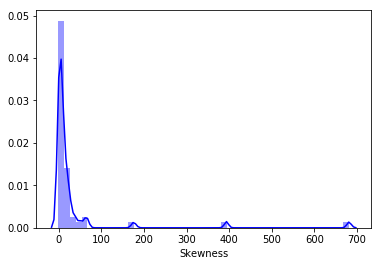

<Figure size 864x576 with 0 Axes>

In [22]:
train_dataset_skew,train_dataset_kurt=train_dataset.skew(),train_dataset.kurt()
sns.distplot(train_dataset_skew,color='blue',axlabel ='Skewness')
plt.figure(figsize = (12,8))
plt.show()

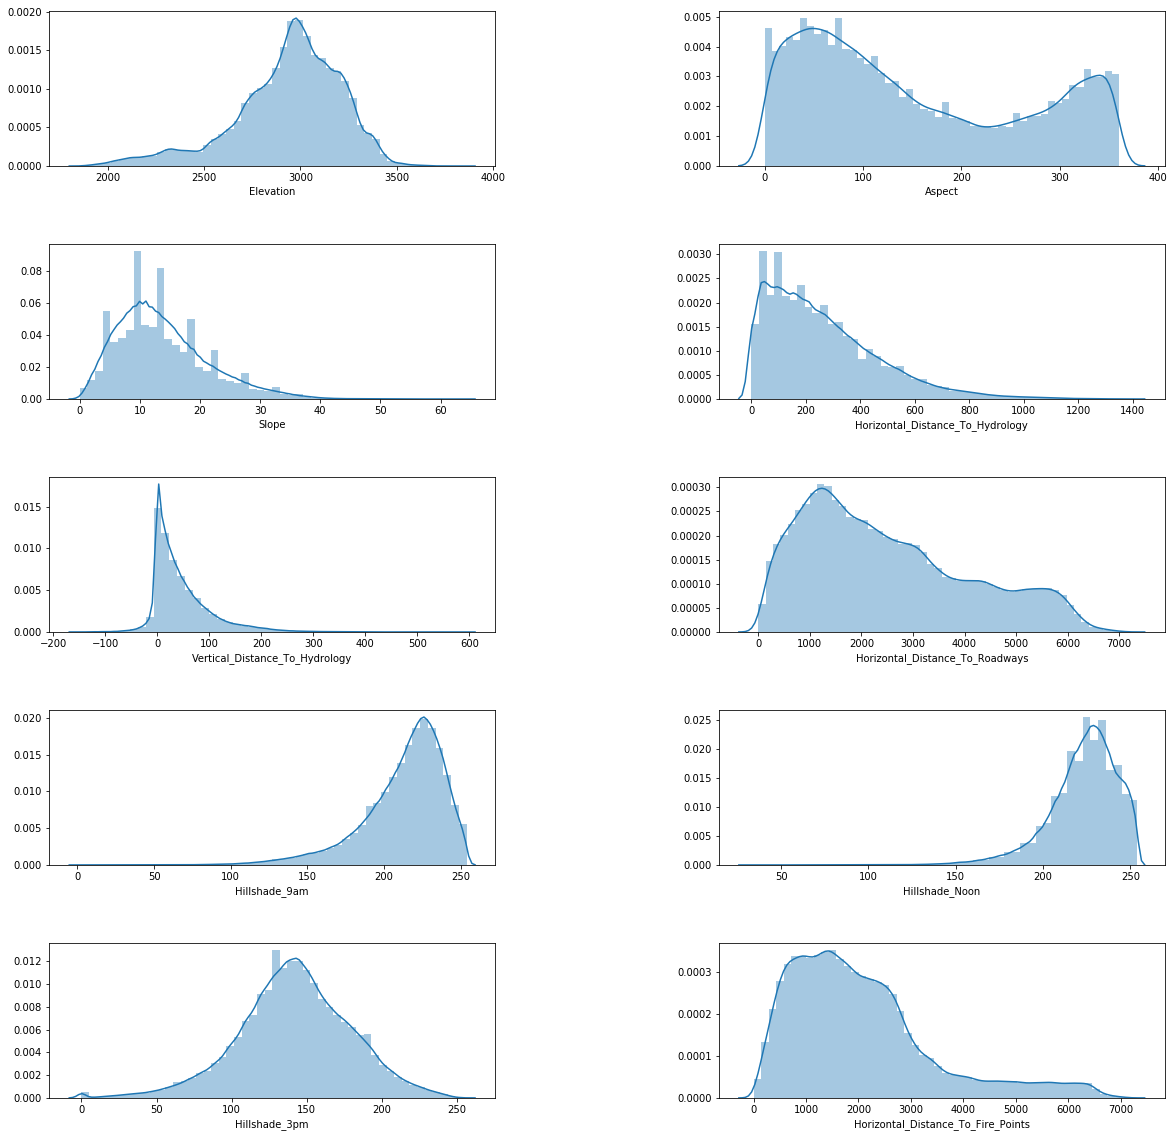

In [23]:
#Plotting Distribution Curves for the feature variables
#Code taken from https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
distribution_plot_list=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 11):
    ax = fig.add_subplot(5,2, i)
    ax = sns.distplot(train_dataset[distribution_plot_list[(i-1)]])

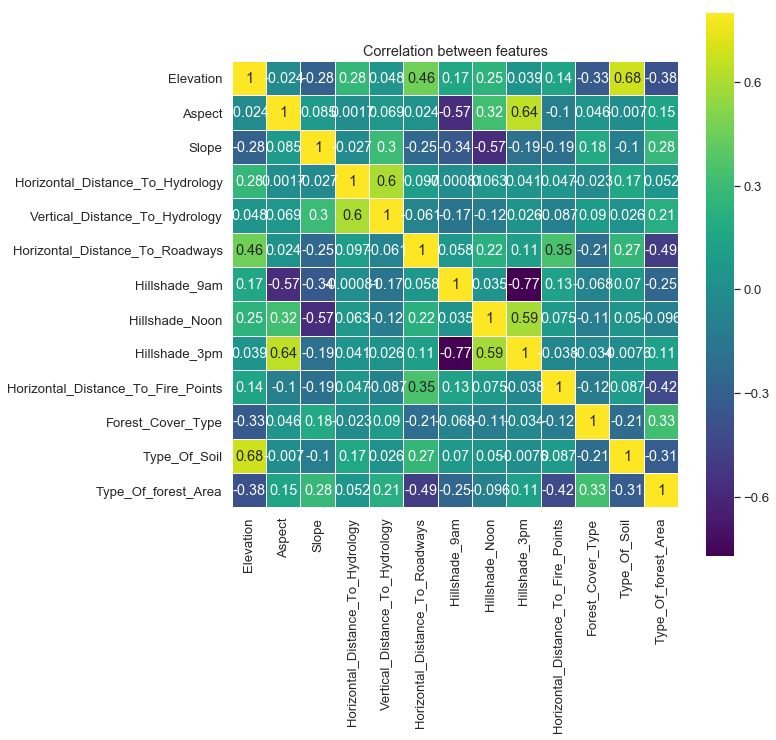

In [24]:
#correlation_matrix=train_dataset[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']].corr()
correlation_matrix=train_dataset[feature_list].corr()
#feature_list
sns.set(font_scale=1.20)
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

### Preliminary Observation
1. There are no null values in the data.
2. Each row has only one soil type and one Forest Area associated with it.
3. Most of the forest areas have 1860m to 3100 m elevation.
4. The Aspect area seems to be normally distributed. 
5. There is a high correlation in the type of forest area and type of forest cover. This makes sense as a forest area will have a certain kind of forest covers.
6. Some other important correlation pairs are (Elevation,Type_Of_Soil),(Aspect,Hillshade_3pm),(Hillshade_3pm,Hillshade_noon),(Hillshade_noon,Elevation),(slope,vertical_distance_to_Hyrdology),


# III. Method


###  Discriminant Analysis
Discriminant Analysis is used to determine which variables discriminate between naturally occurring groups. It is a supervised classification method. We do two primary steps in discriminant analysis:
1. Group Separation: We use a combination of variables known as discriminant functions, of the dependent variables that maximize the separation between the groups. We are going to use the mean the covariance in our work here.
2. Predict: Prediction of new observations to groups using LDA and QDA. 

We will use the Baye's rule for classification here:

$$
\begin{align*}
P(T = k \mid X = x_i) &= \frac{P(X = x_i \mid T = k) P(T=k) } {P(X=x_i)} \\
    \\
\end{align*}
$$

As we can easily find out P(X=X_i) and P(T=k)from the data, we need find out {P(X = x_i \mid T = k) P(T=k). For this we will plugin the Gaussian normal distribution in this as it is the most used and most data is normally distributed.Hence our equation now looks like: 


$$
P(T = k \mid \xv) = \frac{ \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k)} P(T = k)} { P(\xv) }.
$$

Now to predict the data, we have two methods as mentioned below: 
1. Quadratic Discriminant Analysis or QDA:

In the QDA method we have consider separate covariance for every class. The discriminant function for QDA is qudardratic, hence the decision boundary is quadratic. This we call this approach Quadratic Discriminant Analysis. The descriminant function for QDA looks like: 

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

for a new sample $\tilde{\xv}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

#### Implementation
Train Method: The QDA method takes 4 variables, The input data of the class, the mean vector of the trained class, the covariance matrix of the class, the probability of the class in the training data. The method does the calculation as mentioned in the above equation to find discriminant and returns the predicted vector.


2. Linear Discriminant Analysis or LDA:

LDA is simmilar to QDA but we use a single covariance for all the classes. Hence this makes the discrminant function linear. The discriminant function for LDA looks like: 

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

for a new sample $\tilde{\xv}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

The LDA is good when we have lesser data and the variance of different classes is not significantly different.

#### Implementation
Train Method: The LDA method takes 4 variables, The input data of the class, the mean vector of the trained class, the covariance matrix of the whole training data, the probability of the class in the training data. The method does the calculation as mentioned in the above equation to find discriminant and returns the predicted vector.

### A. Super Classs Definition

In [25]:
import numpy as np
import abc
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X-self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

###  QDA

In [26]:
class QDAAlgo(Classifier): 
    """ 
        QDA class 
        
    """
    def __init__(self):
        BaseModel.__init__(self)
            
    # train QDA model
    def train(self, X,mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)
    def use():
        return ;

### LDA

In [27]:
class LDAAlgo(Classifier): 
    """ 
        LDA class       
    """
    def __init__(self):
        BaseModel.__init__(self)
            
    # train LDA model
    def train(self, X,mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)
    
    def use():
        return ;

       

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## Evaluation Metrics

We need evaluation metrics to calibrate "how good is the model" or in simple terms find the accuracy of a model. These metrics can be used to compare different models or also to identify what can be improved in the model to improve the classification accuracy. We will start with a simple and most intuitive metric. 

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

This metric gives us the overall accuracy of the model but does not tell anything about the accuracy in each class. To have a better intuition about the class-wise classification, we will discuss the next metric called confusion matrix.

#### Confusion Matrix
In confusion Matrix, each row represents the predictions from model and column represents the actual classes. The confusion matrix for a binary classification looks like this: 
Here is an example confusion matrix. 

<img src=https://www.dataschool.io/content/images/2015/01/confusion_matrix2.png>


1. <b>TP or True positives</b> are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)
2. <b>Tn or True negatives</b> are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False)
3. <b>FP or False positives </b> are the cases when the actual class of the data point was 0(False) and the predicted is 1(True)
4. <b>FN or False negatives</b> are the cases when the actual class of the data point was 1(True) and the predicted is 0(False)

Accuracy of a confusion matrix is calculated as: 

<img src=https://cdn-images-1.medium.com/max/1600/1*5XuZ_86Rfce3qyLt7XMlhw.png>

Based on the confusion matrix, we have the following metrics of evaluation:

1. <b>Precision</b>: Precision measures the accuracy of positive predictions.

2. <b>Recall or Sensitivity</b>:  Recall measures how well does the model cover the positive class.

Now, based on Precision and recall we have two more metrics. 

1. <b>F1 Score:</b> Instead of using two metrics, F1 is calculated as the harmonic mean of precision and recall as it provides one value of measure.
$$
\begin{align*}
F_1 &= \Bigg( \frac{\frac{1}{precision} + \frac{1}{recall}}{2} \Bigg)^{-1} \\
\\
    &= 2 \times \frac{precision \times recall}{precision + recall} \\
    \\
    &= \frac{TP}{TP + \frac{FN+FP}{2}}
\end{align*}
$$

<b>If either one is really small between precision and recall, the F1 Score raises a flag and is closer to the smaller value than the bigger one, giving the model an appropriate score rather than just an arithmetic mean.</b>

### The ROC Curve
The ROC curve plots the True Positive vs the false positive. The curve with 0% of false positive rate, moving the boundary, it shows the true positive rate by including more false positive areas.

![](https://upload.wikimedia.org/wikipedia/commons/4/4f/ROC_curves.svg)

<b>When the classification results are good, the curve gets closer to rectangular curve, close to 1 on the 0 FPR. </b>




## QDA

In [31]:
st1=train_dataset
class_1_data=st1[st1['Forest_Cover_Type']== 1]
class_2_data=st1[st1['Forest_Cover_Type']== 2]
class_3_data=st1[st1['Forest_Cover_Type']== 3]
class_4_data=st1[st1['Forest_Cover_Type']== 4]
class_5_data=st1[st1['Forest_Cover_Type']== 5]
class_6_data=st1[st1['Forest_Cover_Type']== 6]
class_7_data=st1[st1['Forest_Cover_Type']== 7]

In [32]:
class_2_data.shape

class_1_data=class_1_data.iloc[:,:10]
class_2_data=class_2_data.iloc[:,:10]
class_3_data=class_3_data.iloc[:,:10]
class_4_data=class_4_data.iloc[:,:10]
class_5_data=class_5_data.iloc[:,:10]
class_6_data=class_6_data.iloc[:,:10]
class_7_data=class_7_data.iloc[:,:10]

In [33]:
class_1_mu=class_1_data.mean(axis=0)
class_2_mu=class_2_data.mean(axis=0)
class_3_mu=class_3_data.mean(axis=0)
class_4_mu=class_4_data.mean(axis=0)
class_5_mu=class_5_data.mean(axis=0)
class_6_mu=class_6_data.mean(axis=0)
class_7_mu=class_7_data.mean(axis=0)

class_1_mu=class_1_mu[np.newaxis,:]
class_2_mu=class_2_mu[np.newaxis,:]
class_3_mu=class_3_mu[np.newaxis,:]
class_4_mu=class_4_mu[np.newaxis,:]
class_5_mu=class_5_mu[np.newaxis,:]
class_6_mu=class_6_mu[np.newaxis,:]
class_7_mu=class_7_mu[np.newaxis,:]

In [34]:

class_1_sigma=class_1_data.cov()
class_2_sigma=class_2_data.cov()
class_3_sigma=class_3_data.cov()
class_4_sigma=class_4_data.cov()
class_5_sigma=class_5_data.cov()
class_6_sigma=class_6_data.cov()
class_7_sigma=class_7_data.cov()

In [35]:
prior_1=(class_1_data.shape[0]/st1.shape[0])
prior_2=(class_2_data.shape[0]/st1.shape[0])
prior_3=(class_3_data.shape[0]/st1.shape[0])
prior_4=(class_4_data.shape[0]/st1.shape[0])
prior_5=(class_5_data.shape[0]/st1.shape[0])
prior_6=(class_6_data.shape[0]/st1.shape[0])
prior_7=(class_7_data.shape[0]/st1.shape[0])
#check for priors
prior_1 + prior_2 + prior_3 + prior_4 + prior_5 + prior_6 + prior_7

1.0

In [36]:
train_qda=train_dataset.iloc[:,:10].values
q2=QDAAlgo()


D1_train=q2.train(train_qda,class_1_mu,class_1_sigma,prior_1)
D2_train=q2.train(train_qda,class_2_mu,class_2_sigma,prior_2)
D3_train=q2.train(train_qda,class_3_mu,class_3_sigma,prior_3)
D4_train=q2.train(train_qda,class_4_mu,class_4_sigma,prior_4)
D5_train=q2.train(train_qda,class_5_mu,class_5_sigma,prior_5)
D6_train=q2.train(train_qda,class_6_mu,class_6_sigma,prior_6)
D7_train=q2.train(train_qda,class_7_mu,class_7_sigma,prior_7)



In [37]:
pred_train=np.vstack((D1_train,D2_train,D3_train,D4_train,D5_train,D6_train,D7_train))

pred_train=pred_train.T
predFin_QDA_train=np.argmax(pred_train,1)
predFin_QDA_train=np.array(predFin_QDA_train) +1
T_QDA_train=train_dataset.iloc[:,54].values
cnt=np.count_nonzero(T_QDA_train==predFin_QDA_train)
print(cnt)
print("Accuracy: ", (np.count_nonzero(T_QDA_train==predFin_QDA_train)/T_QDA_train.shape[0]) * 100, "%")


320892
Accuracy:  69.0372410232138 %


(array([159784., 236408.,      0.,  28058.,      0.,   2747.,   9256.,
             0.,  14851.,  13706.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

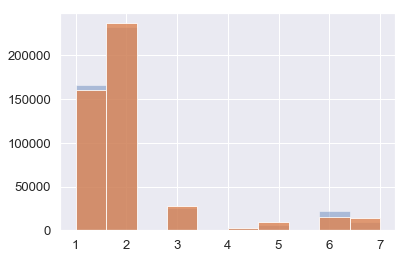

In [38]:
plt.hist(predFin_QDA_train,alpha=0.4)
plt.hist(T_QDA_train,alpha=0.8)

Confusion Matrix accuracy is  69.0372410232138 %
F1 score is 0.5208806751284443


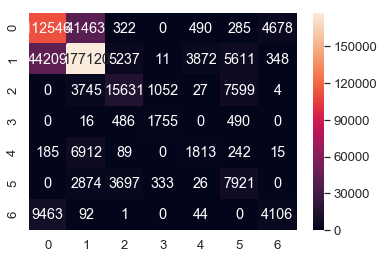

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
cfm_QDA_train=confusion_matrix(T_QDA_train, predFin_QDA_train)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T_QDA_train, predFin_QDA_train, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

([<matplotlib.patches.Wedge at 0x20a9ef06710>,
 [Text(0.4745948358274059, 0.9923506143525874, '1'),
  Text(-0.8571524409240365, -0.6894125709747149, '2'),
  Text(0.8251186509662634, -0.7274470508756042, '3'),
  Text(0.9495474963278291, -0.5553013165998723, '4'),
  Text(0.9829649495909275, -0.4937407294073537, '5'),
  Text(1.0591452928786802, -0.2970037854521971, '6'),
  Text(1.0978966486994948, -0.0679922699607728, '7')])

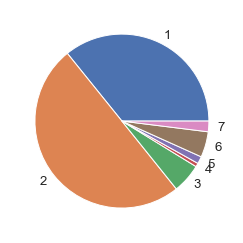

In [40]:
import matplotlib.pyplot as plt
unique, counts = np.unique(predFin_QDA_train, return_counts=True)
plt.pie(counts,labels=unique)

In [41]:
st2=test_dataset.iloc[:,:10].values
q2=QDAAlgo()


D1=q2.train(st2,class_1_mu,class_1_sigma,prior_1)
D2=q2.train(st2,class_2_mu,class_2_sigma,prior_2)
D3=q2.train(st2,class_3_mu,class_3_sigma,prior_3)
D4=q2.train(st2,class_4_mu,class_4_sigma,prior_4)
D5=q2.train(st2,class_5_mu,class_5_sigma,prior_5)
D6=q2.train(st2,class_6_mu,class_6_sigma,prior_6)
D7=q2.train(st2,class_7_mu,class_7_sigma,prior_7)



In [42]:
pred=np.vstack((D1,D2,D3,D4,D5,D6,D7))

pred=pred.T
predFin_QDA=np.argmax(pred,1)
predFin_QDA=np.array(predFin_QDA) +1
T_QDA=test_dataset.iloc[:,54].values
cnt=np.count_nonzero(T_QDA==predFin_QDA)
print(cnt)
print("Accuracy: ", (np.count_nonzero(T_QDA==predFin_QDA)/T_QDA.shape[0]) * 100, "%")


66877
Accuracy:  57.55236570799126 %


(array([52056., 46893.,     0.,  7696.,     0.,     0.,   237.,     0.,
         2516.,  6804.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

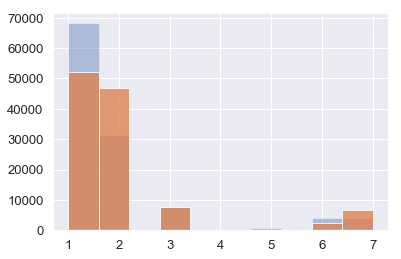

In [43]:
plt.hist(predFin_QDA,alpha=0.4)
plt.hist(T_QDA,alpha=0.8)

Confusion Matrix accuracy is  57.55236570799126 %
F1 score is 0.3613983810422346


C:\Users\prash\Anaconda_Setup\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


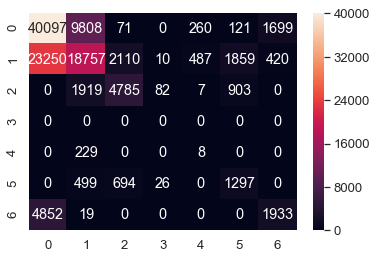

In [44]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(T_QDA, predFin_QDA)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T_QDA, predFin_QDA, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

([<matplotlib.patches.Wedge at 0x20a9fcf4cf8>,
 [Text(-0.2965897361605732, 1.0592613126156367, '1'),
  Text(-0.19740394543478446, -1.0821421728806158, '2'),
  Text(0.8414753346112316, -0.7084626039819717, '3'),
  Text(0.9708213521816048, -0.5172097274300635, '4'),
  Text(0.9828505621944846, -0.493968392100128, '5'),
  Text(1.0398937945471602, -0.35863755528710145, '6'),
  Text(1.0934061483311246, -0.12026219186300843, '7')])

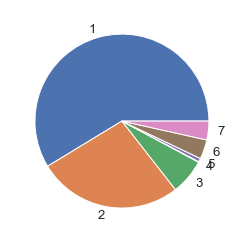

In [45]:
import matplotlib.pyplot as plt
unique, counts = np.unique(predFin_QDA, return_counts=True)
plt.pie(counts,labels=unique)

## LDA

In [46]:
st1=train_dataset
class_1_data=st1[st1['Forest_Cover_Type']== 1]
class_2_data=st1[st1['Forest_Cover_Type']== 2]
class_3_data=st1[st1['Forest_Cover_Type']== 3]
class_4_data=st1[st1['Forest_Cover_Type']== 4]
class_5_data=st1[st1['Forest_Cover_Type']== 5]
class_6_data=st1[st1['Forest_Cover_Type']== 6]
class_7_data=st1[st1['Forest_Cover_Type']== 7]

In [47]:
class_2_data.shape

class_1_data=class_1_data.iloc[:,:10]
class_2_data=class_2_data.iloc[:,:10]
class_3_data=class_3_data.iloc[:,:10]
class_4_data=class_4_data.iloc[:,:10]
class_5_data=class_5_data.iloc[:,:10]
class_6_data=class_6_data.iloc[:,:10]
class_7_data=class_7_data.iloc[:,:10]

In [48]:
class_1_mu=class_1_data.mean(axis=0)
class_2_mu=class_2_data.mean(axis=0)
class_3_mu=class_3_data.mean(axis=0)
class_4_mu=class_4_data.mean(axis=0)
class_5_mu=class_5_data.mean(axis=0)
class_6_mu=class_6_data.mean(axis=0)
class_7_mu=class_7_data.mean(axis=0)

class_1_mu=class_1_mu[np.newaxis,:]
class_2_mu=class_2_mu[np.newaxis,:]
class_3_mu=class_3_mu[np.newaxis,:]
class_4_mu=class_4_mu[np.newaxis,:]
class_5_mu=class_5_mu[np.newaxis,:]
class_6_mu=class_6_mu[np.newaxis,:]
class_7_mu=class_7_mu[np.newaxis,:]

In [49]:
sigma=np.cov(st1.iloc[:,:10].values.T)

In [50]:
prior_1=(class_1_data.shape[0]/st1.shape[0])
prior_2=(class_2_data.shape[0]/st1.shape[0])
prior_3=(class_3_data.shape[0]/st1.shape[0])
prior_4=(class_4_data.shape[0]/st1.shape[0])
prior_5=(class_5_data.shape[0]/st1.shape[0])
prior_6=(class_6_data.shape[0]/st1.shape[0])
prior_7=(class_7_data.shape[0]/st1.shape[0])
#check for priors
prior_1 + prior_2 + prior_3 + prior_4 + prior_5 + prior_6 + prior_7

1.0

In [51]:
lda_train_data=train_dataset.iloc[:,:10].values
l2=LDAAlgo()


D1_train=l2.train(lda_train_data,class_1_mu,sigma,prior_1)
D2_train=l2.train(lda_train_data,class_2_mu,sigma,prior_2)
D3_train=l2.train(lda_train_data,class_3_mu,sigma,prior_3)
D4_train=l2.train(lda_train_data,class_4_mu,sigma,prior_4)
D5_train=l2.train(lda_train_data,class_5_mu,sigma,prior_5)
D6_train=l2.train(lda_train_data,class_6_mu,sigma,prior_6)
D7_train=l2.train(lda_train_data,class_7_mu,sigma,prior_7)



In [52]:
pred_train=np.vstack((D1_train,D2_train,D3_train,D4_train,D5_train,D6_train,D7_train))

pred_train=pred_train.T
predFin_LDA_train=np.argmax(pred_train,1)
predFin_LDA_train=np.array(predFin_LDA_train) +1
T_LDA_train=train_dataset.iloc[:,54].values
cnt=np.count_nonzero(T_LDA_train==predFin_LDA_train)
cnt
print("Accuracy: ", (np.count_nonzero(T_LDA_train==predFin_LDA_train)/T_LDA_train.shape[0]) * 100, "%")


Accuracy:  50.861212108173234 %


### Note
The predicted value in LDA is coming out 1  for every row. I suspect this is happening due to taking a single covariance for the whole data.Also other classes data points are lesser in number.

(array([159784., 236408.,      0.,  28058.,      0.,   2747.,   9256.,
             0.,  14851.,  13706.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

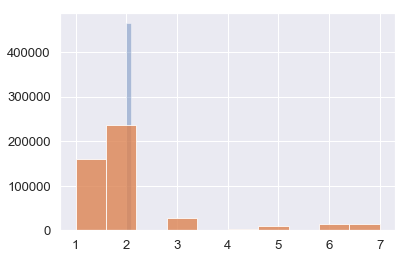

In [54]:
plt.hist(predFin_LDA_train,alpha=0.4)
plt.hist(T_LDA_train,alpha=0.8)

Confusion Matrix accuracy is  50.861212108173234 %
F1 score is 0.09632545493290653


C:\Users\prash\Anaconda_Setup\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


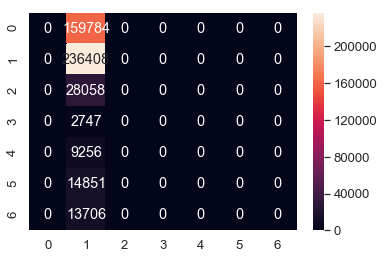

In [55]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(T_LDA_train, predFin_LDA_train)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print("Confusion Matrix accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T_LDA_train, predFin_LDA_train, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

([<matplotlib.patches.Wedge at 0x20a8e5b3438>],
 [Text(-1.1, 1.3471114790620887e-16, '2')])

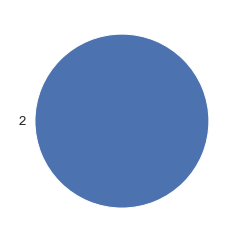

In [56]:
import matplotlib.pyplot as plt
unique, counts = np.unique(predFin_LDA_train, return_counts=True)
plt.pie(counts,labels=unique)

([<matplotlib.patches.Wedge at 0x20a8e5e5c50>,
 [Text(0.5184998970558722, 0.9701329067468283, '1'),
  Text(-0.8977015303200424, -0.6357137425453805, '2'),
  Text(0.8138560461237359, -0.7400259023762882, '3'),
  Text(0.9492471303029822, -0.5558146144278263, '4'),
  Text(0.9911670847089776, -0.4770616419180089, '5'),
  Text(1.0554264453671272, -0.3099597045096524, '6'),
  Text(1.095283466337956, -0.10175523753945899, '7')])

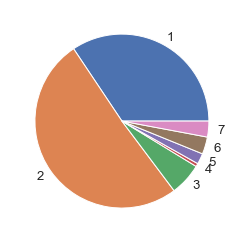

In [57]:
import matplotlib.pyplot as plt
unique, counts = np.unique(T_LDA_train, return_counts=True)
plt.pie(counts,labels=unique)

In [58]:
st2=test_dataset.iloc[:,:10].values
l2=LDAAlgo()


D1=l2.train(st2,class_1_mu,sigma,prior_1)
D2=l2.train(st2,class_2_mu,sigma,prior_2)
D3=l2.train(st2,class_3_mu,sigma,prior_3)
D4=l2.train(st2,class_4_mu,sigma,prior_4)
D5=l2.train(st2,class_5_mu,sigma,prior_5)
D6=l2.train(st2,class_6_mu,sigma,prior_6)
D7=l2.train(st2,class_7_mu,sigma,prior_7)



In [59]:
pred=np.vstack((D1,D2,D3,D4,D5,D6,D7))

pred=pred.T
predFin_LDA=np.argmax(pred,1)
predFin_LDA=np.array(predFin_LDA) +1
T_LDA=test_dataset.iloc[:,54].values
cnt=np.count_nonzero(T_LDA==predFin_LDA)
cnt
print("Accuracy: ", (np.count_nonzero(T_LDA==predFin_LDA)/T_LDA.shape[0]) * 100, "%")


Accuracy:  40.34440026849796 %


(array([52056., 46893.,     0.,  7696.,     0.,     0.,   237.,     0.,
         2516.,  6804.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

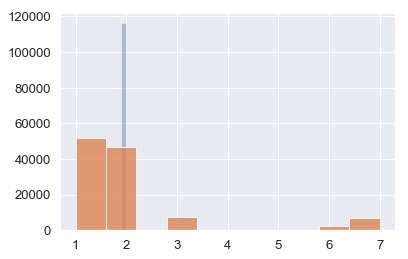

In [60]:
plt.hist(predFin_LDA,alpha=0.4)
plt.hist(T_LDA,alpha=0.8)

accuracy is  40.34440026849796 %
F1 score is 0.09582237265686798


C:\Users\prash\Anaconda_Setup\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


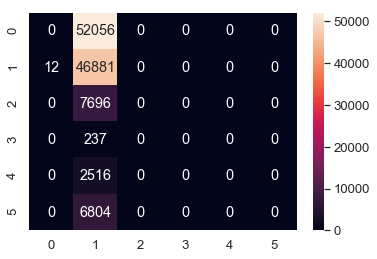

In [61]:
from sklearn.metrics import confusion_matrix
cfm_QDA_train=confusion_matrix(T_LDA, predFin_LDA)
acc=cfm_QDA_train.diagonal().sum()/cfm_QDA_train.sum()
print("accuracy is ",acc*100,"%" )
print("F1 score is",f1_score(T_LDA, predFin_LDA, average='macro'))
sns.heatmap(cfm_QDA_train,annot = True, fmt="d")

([<matplotlib.patches.Wedge at 0x20a925e47b8>,
 [Text(1.0999999421107791, 0.00035687012052722656, '1'),
  Text(-1.0999999421403783, -0.00035677887330254484, '2')])

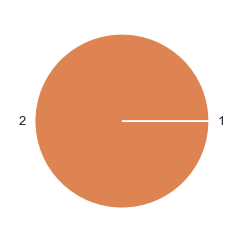

In [62]:
import matplotlib.pyplot as plt
unique, counts = np.unique(predFin_LDA, return_counts=True)
plt.pie(counts,labels=unique)

([<matplotlib.patches.Wedge at 0x20a92621438>,
 [Text(0.1789741008971153, 1.0853424672462002, '1'),
  Text(-0.6479488245689741, -0.8889107495917039, '2'),
  Text(0.8234770743376342, -0.7293048114748254, '3'),
  Text(0.9598302237770914, -0.5373322450067733, '5'),
  Text(0.9971290882242532, -0.46447129234977463, '6'),
  Text(1.081441665004441, -0.20120617583072067, '7')])

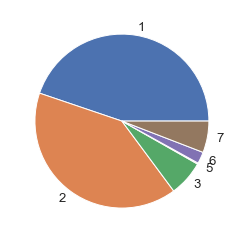

In [63]:
import matplotlib.pyplot as plt
unique, counts = np.unique(T_LDA, return_counts=True)
plt.pie(counts,labels=unique)

## Train And Test Accuracies
<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Training Performance</th> 
    <th>Test Performance</th>
  </tr>
  <tr>
    <td>QDA</td>
    <td>69.03%, F1=0.5208</td> 
    <td>57,5%, F1=0.3613</td>
  </tr>
    <tr>
    <td>Logistic Regression</td>
    <td>65.97%, F1=0.5393</td> 
    <td>27.29%</td>
  </tr>
    <tr>
    <td>LDA</td>
    <td>50.86%, F1=0.0963</td> 
    <td>40.34%, F1=0.0958</td>
  </tr>
    <tr>
    <td>Pocket Algorithm</td>
    <td>classifier1:  9.28 %
classifier2:  14.680000000000001 %
classifier3:  7.3999999999999995 %
classifier4:  20.44 %
classifier5:  8.94 %
classifier6:  5.76 %
classifier7:  2.32 %</td> 
    <td>classifier1:  19.888642192044887 %
classifier2:  15.427445310751967 %
classifier3:  4.437100910483468 %
classifier4:  0.0 %
classifier5:  0.07228791242835751 %
classifier6:  0.9827713808712415 %
classifier7:  2.6703499079189688 %</td>
  </tr>
</table>

## Classification Model Comparision
On the basis of the above metrics and running the experiments, the following are observations for comparison:
1. LDA runs the fastest and the Pocket algorithm runs the slowest.
2. In the case of both pocket and logistic regression, the fit depends on the number of iterations up to a threshold. If the number of iterations is too less then fit is not very good.
3. QDA and Logistic performed similarly in terms of accuracy.QDA provided a better fit but consume all the data. On the other hand, data provided to logistic was lesser due to the computation-intensive nature. 
4. Both pocket algo and logistic algo are heavily dependent on the learning factor.
5. QDA and LDA are more statistical models then machine learning models. The running time is comparatively less.

## Conclusions
1. Forest Coverage data was described and EDA and pre-processing was done.
2. Pocket Algo, Logistic Algo, QDA and LDA was explained and coded while inheriting from base class.
3. Algorithms were applied to the forest data and results were displayed.
4. A lot of challenges faced while applying Logistic regression. When the learning rate is too high or the number of iterations is too high then an error saying "true divide" occurred due to which the weight matrix was becoming NAN.
5. The logistic regression gave the best results for the test data set.
6. The Discriminant Analysis methods classify on the basis of discriminant functions like mean, covariance.
7. Confusion matrix gives a better intuition for the performance of the model.
8. I calculated the simple accuracy by check wherever prediction was correct but when I plotted prediction, it was skewed. Here the confusion matrix comes in handy.
9. Pocket Algorithm takes the most time in weight evaluation. 
10. LDA ran the quickest of all but is giving skewed result.

# References
Following references have been used to do this assingment.
1. https://www.kaggle.com/ambarish/forest-cover-type-eda-and-modelling
2. https://www.kaggle.com/skillsmuggler/eda-and-dimension-reduction
3. https://www.kaggle.com/janiobachmann/melbourne-comprehensive-housing-market-analysis
4. https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
5. https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer?rq=1
6. https://www.kaggle.com/dansbecker/handling-missing-values
7. https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis
8. http://www.aaronschlegel.com/discriminant-analysis/
9. http://www.statsoft.com/Textbook/Discriminant-Function-Analysis
10. https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b